In [1]:
import pandas as pd                                             # For Data Exploration, 
import numpy as np                                              # To create arrays
import nltk                                                     # For Text Pre-processing 
import re                                                       # For Text Pre-processing
from nltk.tokenize import word_tokenize                         # Tokenize text into words
from nltk.stem import PorterStemmer                             # Reducing word to it's root
from sklearn.feature_extraction.text import CountVectorizer     # Create Bag of Words
from sklearn.model_selection import train_test_split            # Split data into groups (Testing and Training)

In [2]:
from nltk.corpus import stopwords
from string import punctuation
trashwords = stopwords.words('english')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

import pickle

In [3]:
# Loading Data

csvData = pd.read_csv('data/dataset.csv', usecols = ["label", "text"])
csvData

,label,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


In [4]:
# Removing duplicates

csvData.drop_duplicates(inplace = True)

# Removing NULL entries
csvData.dropna(inplace = True)

csvData

,label,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20333,ham,SPAM ALERT 🚔 User: Username: @DillyBubbl...
20341,ham,Hum ky h
20342,ham,/ban
20346,ham,Kaisi hii


In [5]:
corpus = []
stemmer = PorterStemmer()
for text in csvData['text']:
    tokenized_text = word_tokenize(text) 
    stemmed_string = ''
    for word in tokenized_text:     
        stemmed_string += stemmer.stem(word) + ' ' #stemmed word
    corpus.append(stemmed_string)
    

len(corpus[0])


687

In [ ]:
from nltk.stem import WordNetLemmatizer

corpusLemma = []
wnl = WordNetLemmatizer()
for text in csvData['text']:
    tokenized_text = word_tokenize(text) 
    stemmed_string = ''
    for word in tokenized_text:     
        stemmed_string += wnl.lemmatize(word) + ' ' #stemmed word
    corpusLemma.append(stemmed_string)

  

In [6]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray() # tokenized text
y = csvData.iloc[:,0].values           #spam / ham

In [7]:
for label in range(len(y)):
    
    if y[label] == "spam":
        y[label]=1
    elif y[label] == "ham":
        y[label]=0 

print(y)
   

 

[1 1 1 ... 0 0 0]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
type(x_train)

numpy.ndarray

In [9]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)

In [11]:
model = Sequential()
model.add(Dense(800, input_shape = (len(x_train[0]),), activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", metrics = ["accuracy"])


In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

logdir='logsTest'
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
hist = model.fit(x_train, y_train, epochs=4, batch_size = 1000, callbacks=[tensorboardCallback])

# model.save('model.h5')

Epoch 1/4
17/17 [==============================] - 33s 2s/step - loss: 0.4532 - accuracy: 0.8082
Epoch 2/4
17/17 [==============================] - 28s 2s/step - loss: 0.1867 - accuracy: 0.9437
Epoch 3/4
17/17 [==============================] - 28s 2s/step - loss: 0.1123 - accuracy: 0.9655
Epoch 4/4
17/17 [==============================] - 27s 2s/step - loss: 0.0707 - accuracy: 0.9787


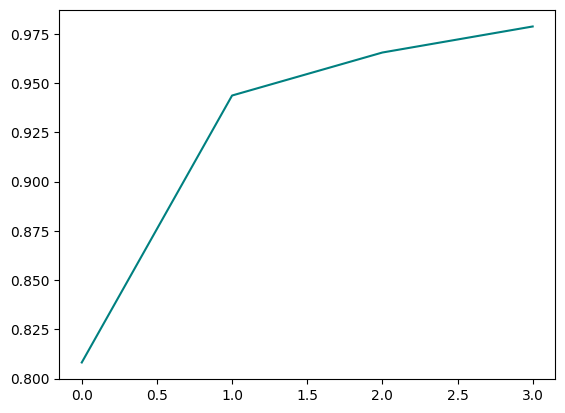

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.show()

In [31]:
user_text = "the work has been assigned to you and the team so update to the team "
prediction = model.predict(cv.transform([user_text]))[0]

prediction
 

1/1 [==============================] - 0s 35ms/step


array([0.11638281], dtype=float32)

In [30]:
if prediction > 0.5:
    print("spam")
else:
    print("ham")     


spam
